In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
class Neural_Network():
    def __init__(self, input_data, output_layer, learning_rate):
        self.input_layer = input_data
        self.learning_rate = learning_rate
        
        self.weights1 = np.random.rand(self.input_layer.shape[1],2)
        self.weights2 = np.random.rand(2,1)
        self.bias1 = 0
        self.bias2 = 0
        
        self.real_output = output_layer
        self.predicted_output = np.zeros(self.real_output.shape)

# define activation function (in this case, sigmoid function)        
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))

# define sigmoid derivative for backpropogation    
    def sigmoid_derivative(self, z):
        return z * (1 - z)

# feed forward process
# O---------->O
    def prediction(self, input_array): 
        #input_array is the first layer in this case
        self.input_layer = input_array
        
        #calculation of Layer_2
        #np.dot (dot product) is for matrix multiplication
        self.z1 = np.dot(self.input_layer, self.weights1) + self.bias1
        self.hidden_layer = self.sigmoid(self.z1)
        
        #calculation of Layer_3(Predicted_Output_Layer)
        self.z2 = np.dot(self.hidden_layer, self.weights2) + self.bias2
        self.predicted_output = self.sigmoid(self.z2)
        return self.predicted_output

# backpropogation process (loss function -> MSE "Mean Squared Error")
# O<------------O
    def backpropogation(self):
        #loss function MSE
        #derivative of the MSE Function
        error = 2*(self.real_output - self.predicted_output)
        #derivative of the sigmoid function
        derivative_sigmoid1 = self.sigmoid_derivative(self.predicted_output)
        
        weights2_update = np.dot(self.hidden_layer.T, error * derivative_sigmoid1)
        weights1_update = np.dot(self.input_layer.T, (np.dot(error * 
                                self.sigmoid_derivative(self.predicted_output), self.weights2.T) *
                                self.sigmoid_derivative(self.hidden_layer)))
        
        self.weights2 += weights2_update * self.learning_rate
        self.weights1 += weights1_update * self.learning_rate
        
        return error
    
    def training(self, number_of_training):
        loss_value_list = []
        for i in range (0, number_of_training):
            self.prediction(self.input_layer)
            loss_value_list.append(sum(self.backpropogation())/4)
            
        loss_value_arr = np.array(loss_value_list)
        la = loss_value_arr
        epoch = np.array(range(1,100001))
        epoch = epoch.reshape(100000,1)
        #plot the absolute value of the error
        plt.plot(epoch, abs(loss_value_arr))
        plt.show

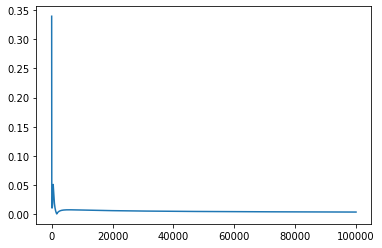

In [37]:
training_input = np.array([[0,0],
                           [0,1],
                           [1,0],
                           [1,1]])
                           
training_outputs = np.array([[0,1,1,0]]).T
                           
#if the learning rate is too small, it takes longer fo the network to learn
neural_network1 = Neural_Network(training_input, training_outputs, 0.5)
neural_network1.training(100000)                           

In [38]:
test = np.array([1,0])
result = neural_network1.prediction(test)
if(result < 0.5):
    print('Answer is 0')
else:
    print('Answer is 1')
print(result)    

Answer is 1
[0.97998206]
